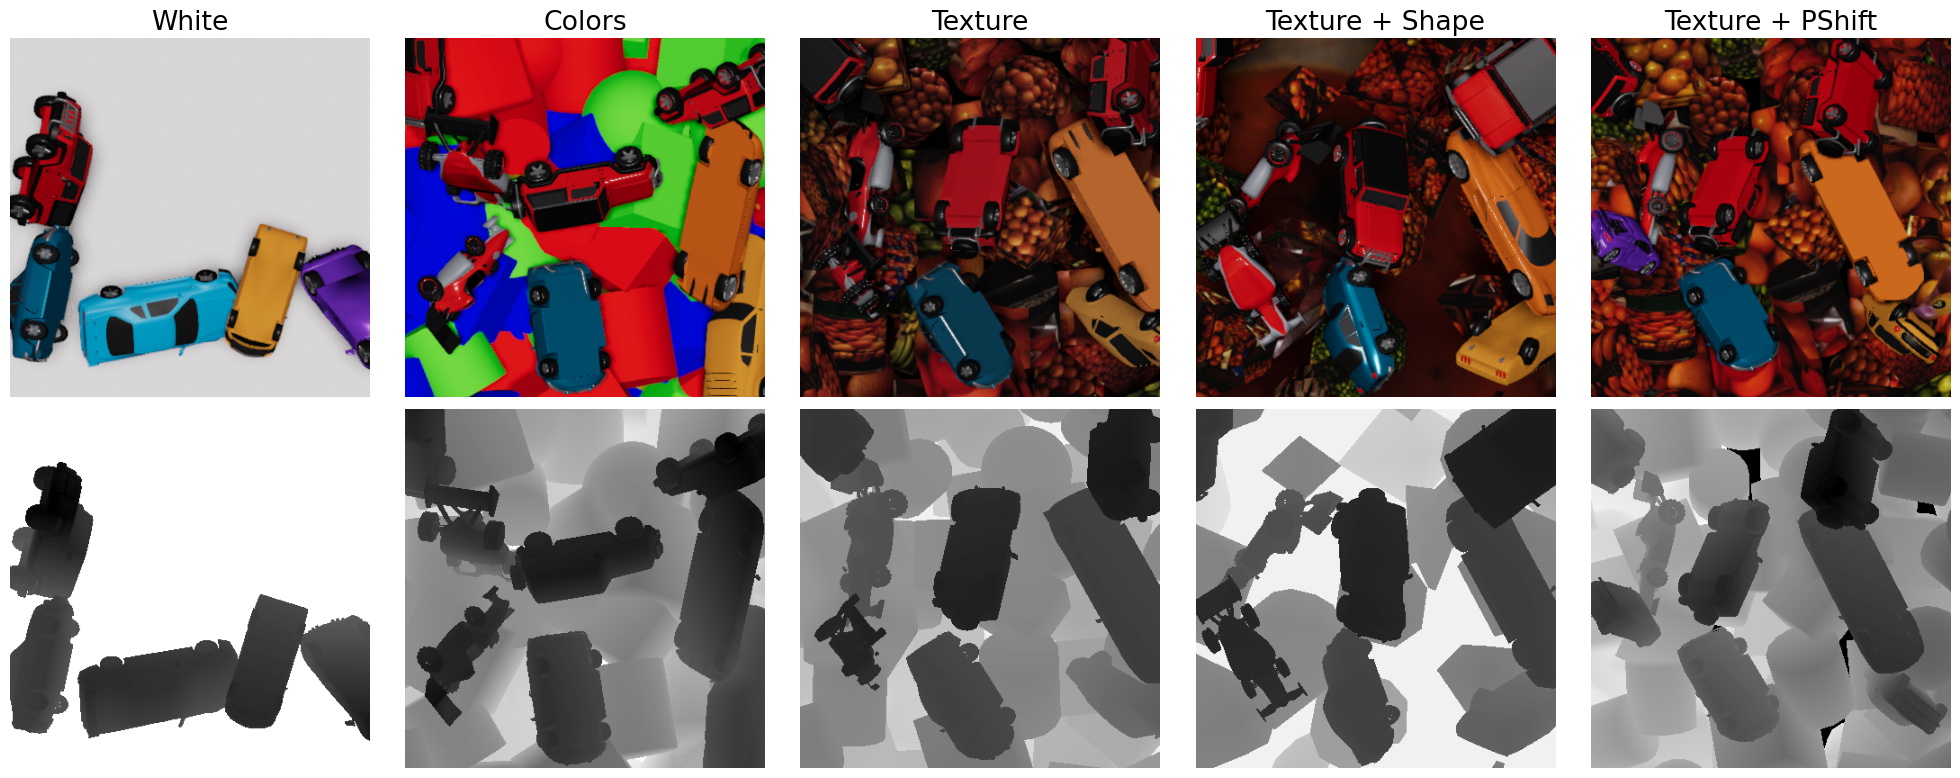

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# code\UsefullnessOfDepth\datasets\foreground_background\SynthDet_cars_foreground_background\RGB\test_0.png
# ..                     \datasets\foreground_background\SynthDet_cars_foreground_background\RGB\test_0.png
# fgbg_rgb_path = r"..\datasets\foreground_background\SynthDet_cars_foreground_background"
# fgbg_diff_color_path = r"..\datasets\foreground_background\SynthDet_carse_foreground_background_diff_color"
# fgbg_diff_white_path = r"..\datasets\foreground_background\SynthDet_carse_foreground_background_diff_white"

fgbg_dir_path = r"..\datasets\test_suite_foreground_background"

names = ["White", "Colors", "Texture", "Texture + Shape", "Texture + PShift"]
exclude = ["texture_flat_far", "white_flat_far"]

depth_folder = "Depth"
RGB_folder = "RGB"
test_image = "test_{0}.png"

fig, ax = plt.subplots(2, 5, figsize=(20, 8))

i = 0
for dir in os.listdir(fgbg_dir_path):
    if any(ex in dir for ex in exclude): continue
    
    path = os.path.join(fgbg_dir_path, dir)
    
    depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(0)), cv2.IMREAD_UNCHANGED)
    rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image.format(0)), cv2.IMREAD_UNCHANGED)

    ax[0, i].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
    ax[0, i].axis("off")
    plt.rcParams.update({'font.size': 16})
    ax[0, i].set_title(names[i])

    ax[1, i].imshow(depth_image, cmap="gray", vmin=0, vmax=255)
    ax[1, i].axis("off")

    i += 1

plt.tight_layout()
plt.show()


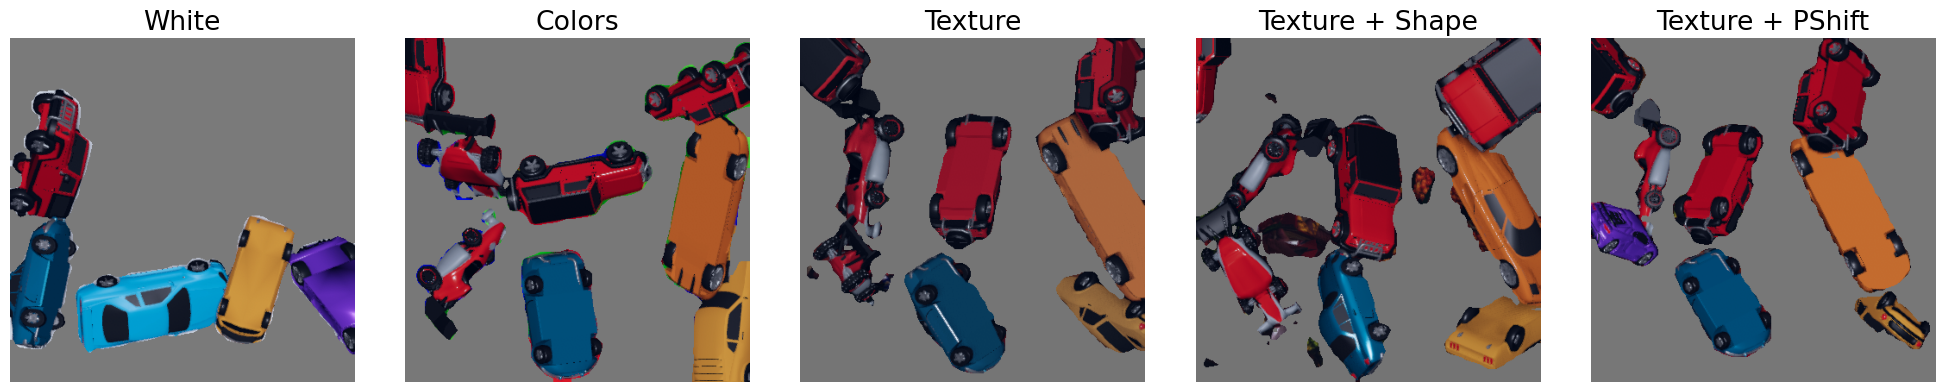

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

fgbg_dir_path = r"..\datasets\test_suite_foreground_background"

names = ["White", "Colors", "Texture", "Texture + Shape", "Texture + PShift"]
exclude = ["texture_flat_far", "white_flat_far"]

background_folder = "background_removed"
test_image = "test_{0}.png"

fig, ax = plt.subplots(1, 5, figsize=(20, 4))

i = 0
for dir in os.listdir(fgbg_dir_path):
    if any(ex in dir for ex in exclude): continue
    
    path = os.path.join(fgbg_dir_path, dir)
    
    rgb_image = cv2.imread(os.path.join(path, background_folder, test_image.format(0)), cv2.IMREAD_UNCHANGED)

    ax[i].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
    ax[i].axis("off")
    plt.rcParams.update({'font.size': 16})
    ax[i].set_title(names[i])

    i += 1

plt.tight_layout()
plt.show()

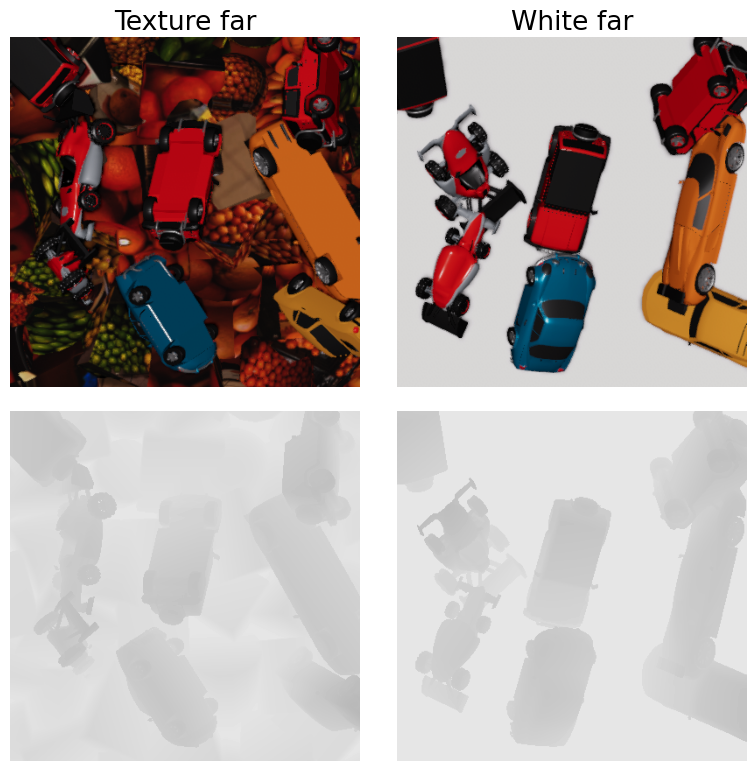

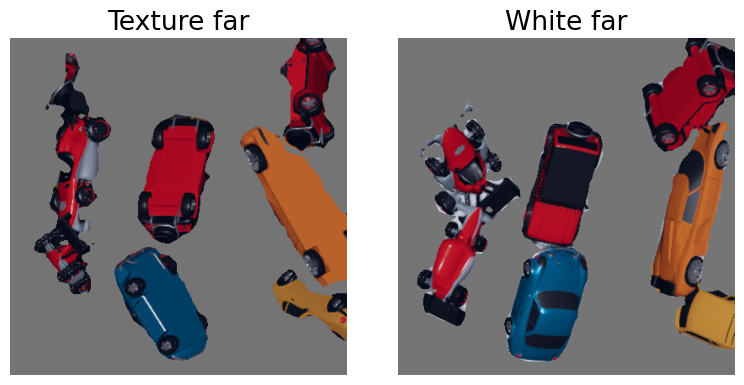

In [19]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

fgbg_dir_path = r"..\datasets\test_suite_foreground_background"

names = ["Texture far", "White far"]
include = ["texture_flat_far", "white_flat_far"]

depth_folder = "Depth"
RGB_folder = "RGB"
test_image = "test_{0}.png"



# dataset_index = 1

for dataset_index in range(1):
    fig, ax = plt.subplots(2, 2, figsize=(8, 8))

    i = 0
    for dir in os.listdir(fgbg_dir_path):
        if not any(ex in dir for ex in include): continue
        
        path = os.path.join(fgbg_dir_path, dir)
        
        depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(dataset_index)), cv2.IMREAD_UNCHANGED)
        rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image.format(dataset_index)), cv2.IMREAD_UNCHANGED)

        ax[0, i].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
        ax[0, i].axis("off")
        plt.rcParams.update({'font.size': 16})
        ax[0, i].set_title(names[i])

        ax[1, i].imshow(depth_image, cmap="gray", vmin=0, vmax=255)
        ax[1, i].axis("off")

        i += 1

    plt.tight_layout()
    plt.show()

    background_folder = "background_removed"
    test_image = "test_{0}.png"

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    i = 0
    for dir in os.listdir(fgbg_dir_path):
        if not any(ex in dir for ex in include): continue
        
        path = os.path.join(fgbg_dir_path, dir)
        
        rgb_image = cv2.imread(os.path.join(path, background_folder, test_image.format(dataset_index)), cv2.IMREAD_UNCHANGED)

        ax[i].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
        ax[i].axis("off")
        plt.rcParams.update({'font.size': 16})
        ax[i].set_title(names[i])

        i += 1

    plt.tight_layout()
    plt.show()

Orange flat: 2.6257264596226
Orange_objects: 3.7729739595181884
Orange_objects_texture: 4.0967823506532275


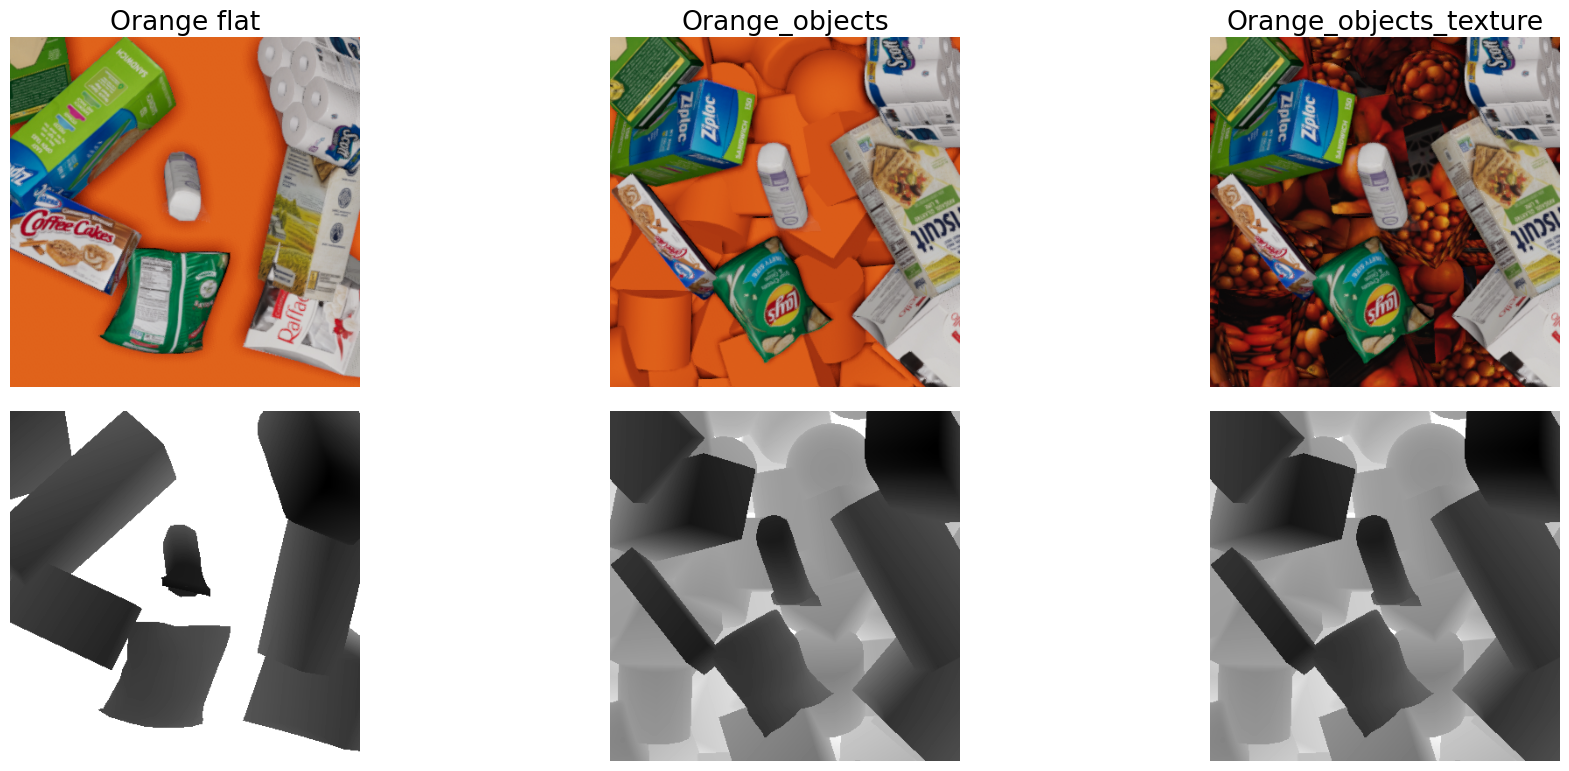

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure

fgbg_dir_path = r"..\datasets\test_suite_fgbg"

names = ["Orange flat", "Orange_objects", "Orange_objects_texture"]
exclude = ["texture_flat_far", "white_flat_far"]

depth_folder = "Depth"
RGB_folder = "RGB"
label_folder = "Labels"
test_image = "test_{0}.png"

for j in range(1):
    i = 0
    fig, ax = plt.subplots(2, 3, figsize=(20, 8))
    for dir in os.listdir(fgbg_dir_path):
        if any(ex in dir for ex in exclude): continue
        
        path = os.path.join(fgbg_dir_path, dir)
        
        depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(j)), cv2.IMREAD_GRAYSCALE)
        rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image.format(j)), cv2.COLOR_BGR2RGB)
        rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
        label_image = cv2.imread(os.path.join(path, label_folder, test_image.format(j)), cv2.IMREAD_UNCHANGED)

        foreground_only = label_image != 0
        rgb_filtered = rgb_image.copy()
        rgb_filtered[foreground_only] = 0

        entropy = skimage.measure.shannon_entropy(cv2.cvtColor(rgb_filtered, cv2.COLOR_RGB2GRAY))
        print(f"{names[i]}: {entropy}")

        ax[0, i].imshow(rgb_image)
        ax[0, i].axis("off")
        plt.rcParams.update({'font.size': 16})
        ax[0, i].set_title(names[i])

        ax[1, i].imshow(depth_image, cmap="gray", vmin=0, vmax=255)
        ax[1, i].axis("off")

        i += 1

    plt.tight_layout()
    plt.show()

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure

fgbg_dir_path = r"..\datasets\test_suite_fgbg"

names = ["Orange flat", "Orange_objects", "Orange_objects_texture", "Orange_texture"]
exclude = ["green"]

depth_folder = "Depth"
RGB_folder = "RGB"
label_folder = "Labels"
test_image = "test_{0}.png"
gradient_magnitudes = []
for x in range(len(names)):
    gradient_magnitudes.append([])

for j in range(500):
    i = 0
    for dir in os.listdir(fgbg_dir_path):
        if any(ex in dir for ex in exclude): continue
        
        path = os.path.join(fgbg_dir_path, dir)
        
        # depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(j)), cv2.IMREAD_GRAYSCALE)
        rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image.format(j)), cv2.COLOR_BGR2RGB)
        if rgb_image is None: continue
        rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
        label_image = cv2.imread(os.path.join(path, label_folder, test_image.format(j)), cv2.IMREAD_UNCHANGED)

        foreground_only = label_image != 0
        rgb_filtered = rgb_image.copy()
        rgb_filtered[foreground_only] = 0

        entropy = skimage.measure.shannon_entropy(cv2.cvtColor(rgb_filtered, cv2.COLOR_RGB2GRAY))
        gradient_magnitudes[i].append(entropy)

        i += 1

for i, name in enumerate(names):
    print(f"{name} mean: {np.mean(gradient_magnitudes[i])}")
    print(f"{name} std: {np.std(gradient_magnitudes[i])}")

Orange flat mean: 2.615777918730217
Orange flat std: 0.3309363081977115
Orange_objects mean: 4.249681797752312
Orange_objects std: 0.8053048012204141
Orange_objects_texture mean: 4.65490073969124
Orange_objects_texture std: 0.9793840915089594
Orange_texture mean: 4.764577796831781
Orange_texture std: 1.0165620709296384


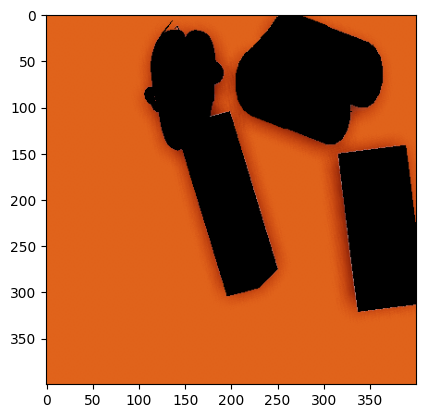

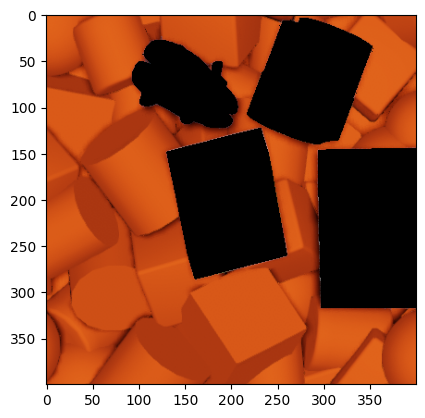

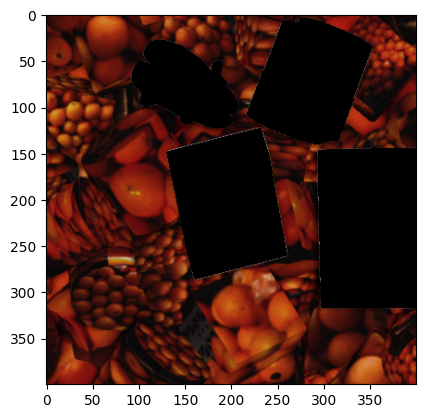

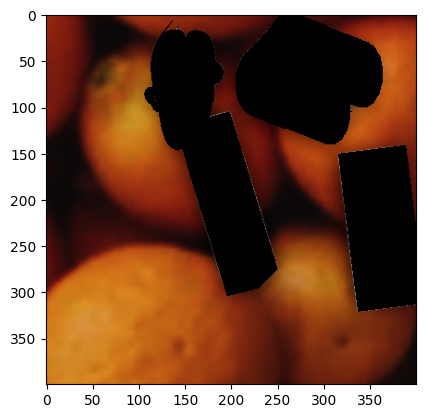

Orange flat mean: 11.93077374181217
Orange flat std: 3.2777972069152677
Orange flat entropy mean: 2.615777918730217
Orange flat entropy std: 0.3309363081977115
Orange_objects mean: 17.98615187906842
Orange_objects std: 1.8570800566095182
Orange_objects entropy mean: 4.249681797752311
Orange_objects entropy std: 0.8053048012204141
Orange_objects_texture mean: 30.288409684493033
Orange_objects_texture std: 7.335998323925275
Orange_objects_texture entropy mean: 4.654900739691241
Orange_objects_texture entropy std: 0.9793840915089594
Orange_texture mean: 10.998482418413698
Orange_texture std: 1.6948184274826898
Orange_texture entropy mean: 4.76457779683178
Orange_texture entropy std: 1.0165620709296381


In [21]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure

def show_gradient_magnitude_background(
        fgbg_dir_path: str,
        names: list,
        exclude: list,
        depth_folder: str="Depth",
        RGB_folder: str="RGB",
        label_folder: str="labels",
):
    gradient_magnitudes = []
    entropy_values = []
    for x in range(len(names)):
        gradient_magnitudes.append([])
        entropy_values.append([])

    i = 0
    for dir in os.listdir(fgbg_dir_path):
        if any(ex in dir for ex in exclude): continue
        for filename in [f for f in os.listdir(os.path.join(fgbg_dir_path, dir, RGB_folder)) if f.startswith("test")]:
            path = os.path.join(fgbg_dir_path, dir)
            
            # depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(j)), cv2.IMREAD_GRAYSCALE)
            rgb_image = cv2.imread(os.path.join(path, RGB_folder, filename), cv2.COLOR_BGR2RGB)
            if rgb_image is None: continue
            rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
            label_image = cv2.imread(os.path.join(path, label_folder, filename), cv2.IMREAD_UNCHANGED)

            foreground_only = label_image != 0
            rgb_filtered = rgb_image.copy()
            rgb_filtered[foreground_only] = 0

            if "101" in filename:
                import matplotlib.pyplot as plt
                plt.imshow(rgb_filtered)
                plt.show()

            # Compute the gradients using Sobel filter
            sobel_x = cv2.Sobel(rgb_filtered, cv2.CV_64F, 1, 0, ksize=3)
            sobel_y = cv2.Sobel(rgb_filtered, cv2.CV_64F, 0, 1, ksize=3)
            gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

            # Calculate the average gradient magnitude
            avg_gradient_magnitude = np.mean(gradient_magnitude)
            gradient_magnitudes[i].append(avg_gradient_magnitude)

            entropy = skimage.measure.shannon_entropy(cv2.cvtColor(rgb_filtered, cv2.COLOR_RGB2GRAY))
            entropy_values[i].append(entropy)

        i += 1

    for i, name in enumerate(names):
        print(f"{name} mean: {np.mean(gradient_magnitudes[i])}")
        print(f"{name} std: {np.std(gradient_magnitudes[i])}")
        print(f"{name} entropy mean: {np.mean(entropy_values[i])}")
        print(f"{name} entropy std: {np.std(entropy_values[i])}")

fgbg_dir_path = r"..\datasets\test_suite_fgbg"

names = ["Orange flat", "Orange_objects", "Orange_objects_texture", "Orange_texture"]
exclude = ["green"]

depth_folder = "Depth"
RGB_folder = "RGB"
label_folder = "labels"

show_gradient_magnitude_background(fgbg_dir_path, names, exclude, depth_folder, RGB_folder, label_folder)

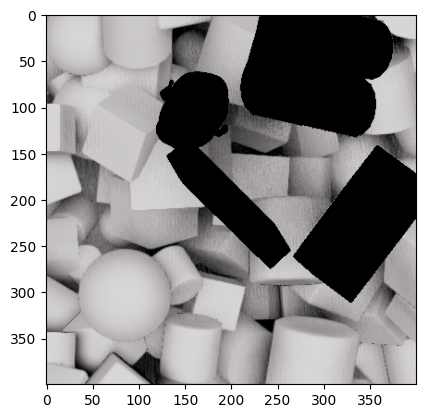

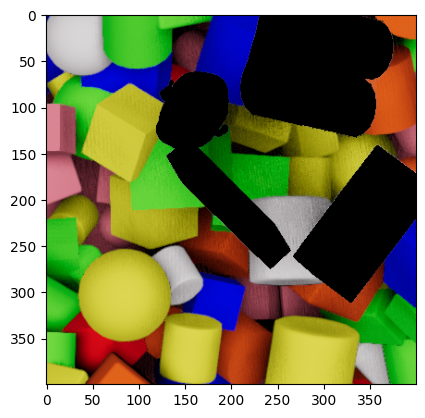

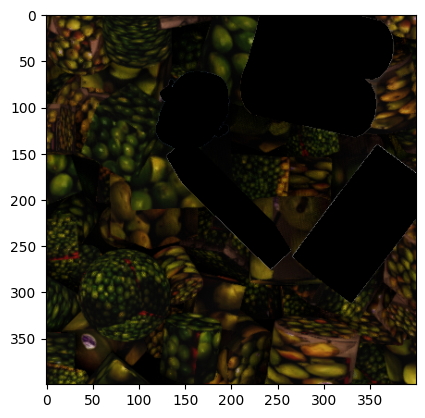

White mean: 38.86246966320178
White std: 3.6423771256900555
White entropy mean: 5.484181754946482
White entropy std: 0.6622371550003047
Color mean: 33.98098951287452
Color std: 4.149030059083143
Color entropy mean: 5.823171279784917
Color entropy std: 0.8479665322926022
Texture mean: 30.263150446666238
Texture std: 7.000995142181698
Texture entropy mean: 4.875906032881903
Texture entropy std: 0.7420591149696194


In [22]:
fgbg_large_spacing_dir_path = r"..\datasets\test_suite_fgbg_large_spacing_appearance"
names = ["White", "Color", "Texture"]
exclue = []

show_gradient_magnitude_background(fgbg_large_spacing_dir_path, names, exclude)